# Covariance Matrix

> References:
> - [Understanding The Covariance Matrix](https://datascienceplus.com/understanding-the-covariance-matrix/)

## Introduction

- 协方差矩阵: covariance matrix
- 协方差: covariance
- 方差($\sigma^2$): variance
- 标准差($\sigma$): standard deviation. 方差开根号. 

协方差是衡量两个独立随机变量间的关系, 等于零表示没有关系, 大于零表示正相关, 小于零表示负相关.

下面看一下方差和协方差的公式:

方差:

$$
\sigma^2_x = \frac{1}{n-1}\sum^n_{i=1}(x_i-\bar{x})^2
$$

协方差:

$$
\sigma(x,y) = \frac{1}{n-1}\sum^n_{i=1}(x_i-\bar{x})(y_i-\bar{y})
$$

从上面方差和协方差公式可以发现, 实际方差就是变量$x$与自己的协方差, 即 $\sigma(\pmb x, \pmb x)$.

## Covariance Matrix

根据协方差我们可以计算协方差矩阵, 对于给定的一个方阵, 其协方差为 $C_{i,j} = \sigma(x_i, y_j)$ 其中 $C \in \mathbb{R^{d \times d}}$, 其中 $d$ 是随机变量的维度.

因为 $\sigma(x_i,x_j) = \sigma(x_j, x_i)$, 所以协方差是对称的.

协方差矩阵的对角元素就是方差. 协方差矩阵表示为:

$$
C = \frac{1}{n-1}\sum^n_{i=1}(X_i - \bar{X})(X_i - \bar{X})
$$

这里的矩阵 $X \in \mathbb{R^{n \times d}}$, 即 $X$ 表示数据集, 有 $n$ 个样本, 每个样本有 $d$ 列.

当我们聚焦在只有 2 个字段的数据集时, 它的协方差矩阵是一个 $2 \times 2$ 的方阵, 表示如下

$$
C =
  \begin{pmatrix}
    \sigma(x, x) & \sigma(x, y) \\
    \sigma(y, x) & \sigma(y, y) \\
  \end{pmatrix}
$$

上面的 $x$ 是向量, 表示第一列, $y$ 也是向量, 表示第二列. 为了更清新的表述意思, 使用 `pandas` 的 `DataFrame` 来表示

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame({
  'x': np.random.randint(10, 100, size=10),
  'y': np.random.randint(100, 200, size=10)
})
df

,x,y
0,68,167
1,24,136
2,33,152
3,64,177
4,84,162
5,88,170
6,54,152
7,81,126
8,32,156
9,90,173


我们想展示线性变换如何影响数据集以及最终如何得到协方差矩阵. 首先我们需要产生一些随机变量, 这些随机变量取自标准正态分布(均值为 0, 方差为 1). 这么设计数据集的原因是我们希望数据集的协方差矩阵是一个单位矩阵.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

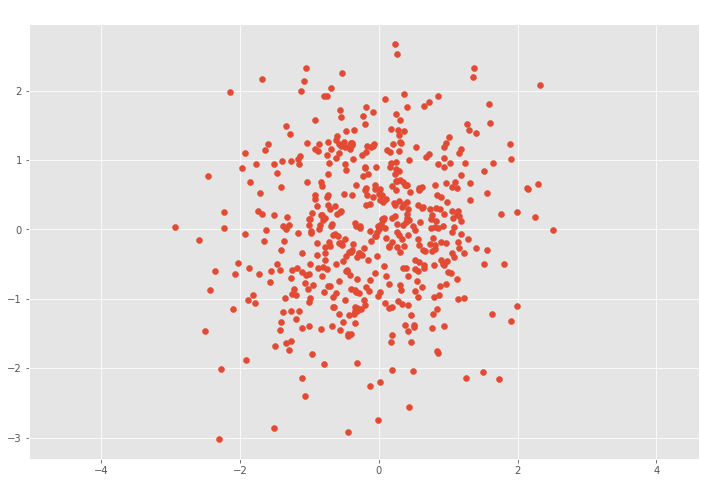

In [8]:
# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.axis('equal')
plt.show()

上面的例子中 $x$ 和 $y$ 都是独立变量, 它的协方差矩阵是

$$
C =
  \begin{pmatrix}
    \sigma^2_x & 0 \\
    0 & \sigma^2_y \\
  \end{pmatrix}
$$

还因为我们是从标准正态分布中提取的数据, 也就是说 $x$ 和 $y$ 的方差应该是 1

$$
C =
  \begin{pmatrix}
    1 & 0 \\
    0 & 1\\
  \end{pmatrix}
$$

下面我们通过编写计算协方差和协方差矩阵的函数来验证一下

In [11]:
# Covariance
def cov(x, y):
  x_bar, y_bar = x.mean(), y.mean()
  return np.sum((x - x_bar) * (y - y_bar)) / (len(x) - 1)

# Covariance Matrix
def cov_mat(X):
  return np.array([
    [cov(X[0], X[0]), cov(X[0], X[1])], 
    [cov(X[1], X[0]), cov(X[1], X[1])]
  ])

In [15]:
# Calculate covariance matrix
cov_mat(X.T)

array([[0.92942731, 0.1129788 ],
       [0.1129788 , 1.02667208]])

## Linear Transformations of the Data Set

接着, 我们将看一下变换(transformation)如何影响数据和协方差矩阵 $C$. 使用下面的缩放矩阵(scaling matrix)对数据进行变换.

> *缩放矩阵(scaling matrix)是对角方阵, 在线性代数中对角方阵的意义就是对空间中的每个轴进行缩放.*

$$
S =
  \begin{pmatrix}
    s_x & 0 \\
    0 & s_y \\
  \end{pmatrix}
$$

我们期望变换后的数据的协方差矩阵是

$$
C = 
  \begin{pmatrix}
    (s_x\sigma_x)^2 & 0 \\
    0 & (s_y\sigma_y)^2 \\
  \end{pmatrix}
$$

这样做的意义是为了说明, 我们可以通过 $S = \sqrt{C}$ 来从协方差矩阵中提取一个缩放矩阵, 这样数据的变换就可以用 $Y = SX$ 来实现.

> *下面的代码中有段 `X = X - np.mean(X, 0)`, 这段代码的目的是将数据集移动到以零为中心的位置, 即数据集居中操作. 其本质是通过残差性质来实现的, 因为残差的和为零, 也就是说残差的均值为零.*

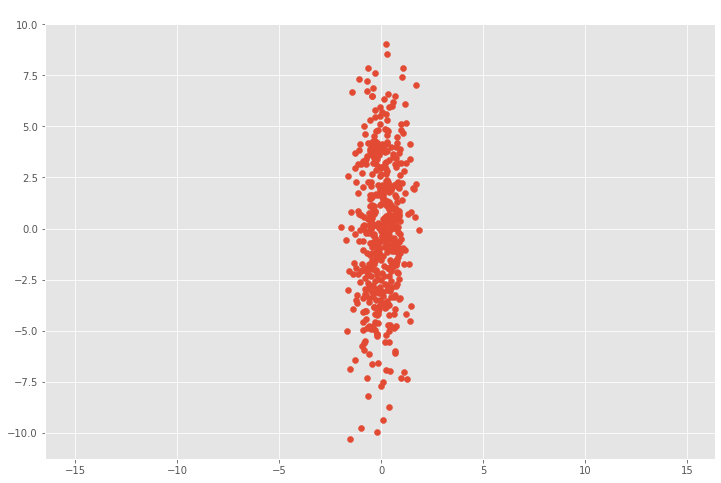

In [18]:
# Center the matrix at the origin. 将矩阵以原点来居中
X = X - np.mean(X, 0)

# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([
  [sx, 0],
  [0, sy]
])

# Apply scaling matrix to X
Y = X.dot(Scale)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Generated Data')
plt.axis('equal')
plt.show()

In [20]:
# Calculate covariance matrix for Y
cov_mat(Y.T)

array([[ 0.45541938,  0.26888954],
       [ 0.26888954, 11.86832926]])

我们已经看到缩放矩阵对数据的线性变换, 接着使用旋转矩阵(rotation matrix)来对数据进行旋转. 我们把缩放矩阵和旋转矩阵组合到一起, 定义一个新的矩阵 $T$

$$
T = RS
$$

其中, $S$ 代表缩放矩阵, $R$ 代表旋转矩阵.

旋转矩阵 $R$ 定义为

$$
R =
  \begin{pmatrix}
    \cos(\theta) & -\sin(\theta) \\
    \sin(\theta) & \cos(\theta)
  \end{pmatrix}
$$

其中 $\theta$ 是旋转角度.

对数据进行缩放和旋转变化可以表示为 $Y = TX = RSX$

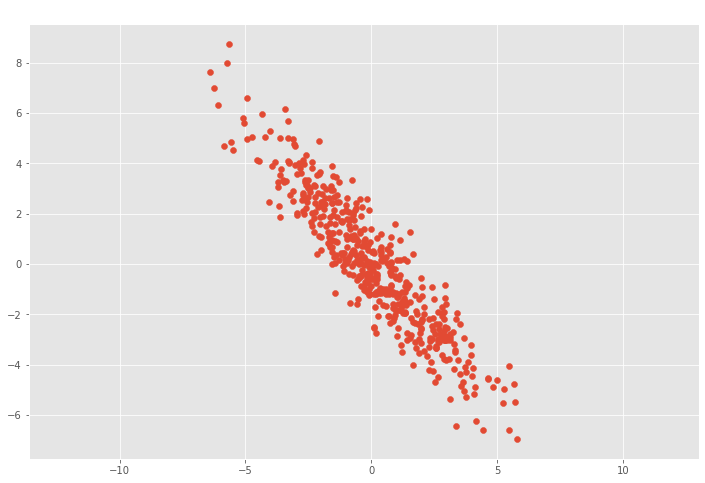

In [22]:
# Rotation matrix
theta = 0.77 * np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([
  [c, -s],
  [s, c]
])
# Transformation matrix
T = Scale.dot(Rot)
# Apply transformation matrix to X
Y = X.dot(T)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal')
plt.show()

In [24]:
# Calculate covariance matrix
cov_mat(Y.T)

array([[ 5.17989661, -5.62775704],
       [-5.62775704,  7.14385203]])

## Eigen Decomposition of the Covariance Matrix

协方差矩阵的特征分解.

如果我们将协方差矩阵的所有特征向量以列向量方式组成一个矩阵 $V$, 所有的特征值做为矩阵 $L$ 主对角元素, 那么我们可以得到如下的等式

$$
CV = VL
$$

协方差矩阵可以表示为:

$$
C = VLV^{-1}
$$

特征向量是单位向量表示数据最大方差的方向, 而特征值表示这个方差在相应的方向上的大小. 这就意味着, $V$ 表示一个旋转矩阵, $\sqrt{L}$ 表示一个缩放矩阵. 根据这个等式, 我们可以将协方差矩阵表示为

$$
C = RSSR^{-1}
$$

这里的旋转矩阵 $R = V$, 缩放矩阵 $S = \sqrt{L}$. 我们将旋转矩阵和缩放矩阵组合形成一个新的矩阵称之为线性转换矩阵 $T = RS$, 那么可以将上面的等式改写为:

$$
C = TT^{T}
$$